## Supervised learning – System Design and Debugging

In [33]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
import pandas as pd
import random as rd

%matplotlib inline



### Exercice 1 Gradient descent using matrix calculation

In [34]:
path = '/Users/lorenz/Documents/ML-PW-2018/PW05'

dataset = pd.read_csv(path +'/appart_lausanne.csv',names=['living_area','nb_rooms','rent'])
rent = dataset['rent'].values
living_area = dataset['living_area'].values
nb_rooms = dataset['nb_rooms'].values

#Normal
rent = 1.0 * (rent - np.min(rent)) / (np.max(rent) - np.min(rent))
living_area = 1.0 * (living_area - np.min(living_area)) / (np.max(living_area) - np.min(living_area))
nb_rooms = 1.0 * (nb_rooms - np.min(nb_rooms)) / (np.max(nb_rooms) - np.min(nb_rooms))


X = np.c_[living_area,nb_rooms]

In [35]:
def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.ones(D)  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y                     #N dimension
        gradient = X_trans.dot(loss) * (1.0/N)  
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

a) Analyse the code above. It relies on matrix calculation. What type of gradient descent
does it implement ? Are you confident it is a correct implementation ?

It implements a batch gradient descent. 
One of the two (1/N) 
is not needed/too much. For the verification:




In [36]:
regr = linear_model.LinearRegression()
res = regr.fit(X,rent)

theta_ver = [regr.intercept_,regr.coef_[0],regr.coef_[1],]

slope_1_ver = theta_ver[1]
slope_2_ver = theta_ver[2]
intercept_ver = theta_ver[0]
print(theta_ver)

[-0.015159273721957744, 0.9713481409176297, -0.06245853332215634]


With the version given in the exercise:

In [37]:
Xtmp = np.c_[np.ones(X.shape[0]),X]

lr = 0.001
itr = 200000

theta_ori = gradientDescent(Xtmp,rent,lr,itr,verbose=False)
print(theta_ori)

slope_1_ori = theta_ori[1]
slope_2_ori = theta_ori[2]
intercept_ori = theta_ori[0]

[0.19245213 0.72512451 0.64030322]


In [38]:
def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradient_descent_fixed(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.ones(D)  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y                     #N dimension
        gradient = X_trans.dot(loss) # <- here the 1/N is deleted
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

In [39]:
Xtmp = np.c_[np.ones(X.shape[0]),X]

lr = 0.001
itr = 200000

theta = gradient_descent_fixed(Xtmp,rent,lr,itr,verbose=False)
print(theta)

slope_1 = theta[1]
slope_2 = theta[2]
intercept = theta[0]

[-0.00748463  0.75974436  0.0838912 ]


b) Let’s use the data from last week exercise ‘lausanne-appart.xlsx’ from moodle. The code
above should help us to redo exercise 6b on multi-variable inputs. To use the code above,
you first need to build the design matrix
X
as follow :

with living area in the second column and number of rooms in the third column. Plot
the plane
$h_\theta(x) =\theta0+\theta_1x_1+\theta_2x_2$
on top of the 3d scatter plot.

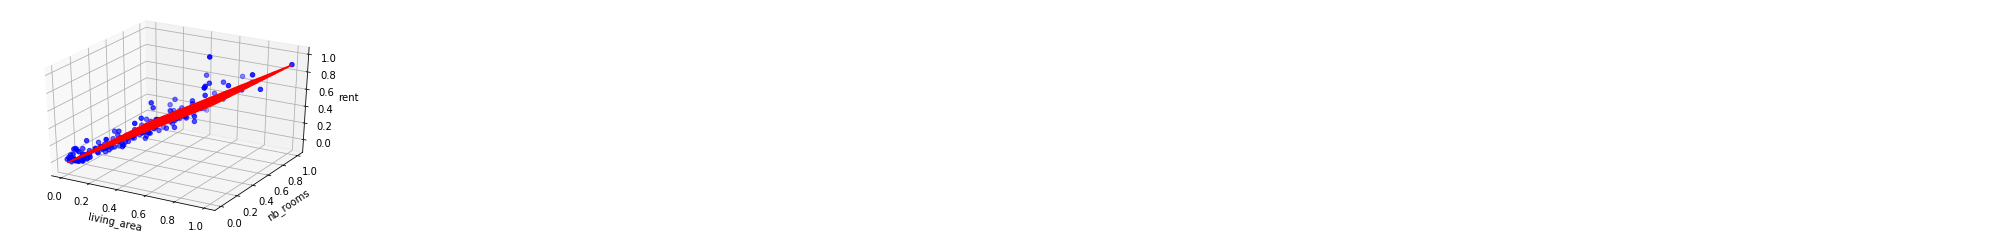

In [83]:
x = np.array(np.linspace(np.min(X),np.max(X),10))
y = np.array(np.linspace(np.min(X),np.max(X),10))
x,y = np.meshgrid(x,y)
z_ver = intercept_ver + (x * slope_1_ver) + (y * slope_2_ver)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax = plt.gca(projection='3d')
ax.scatter(living_area,nb_rooms,rent,color='blue')
ax.plot_wireframe(x,y,z_ver,color='red')
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')

plt.show()

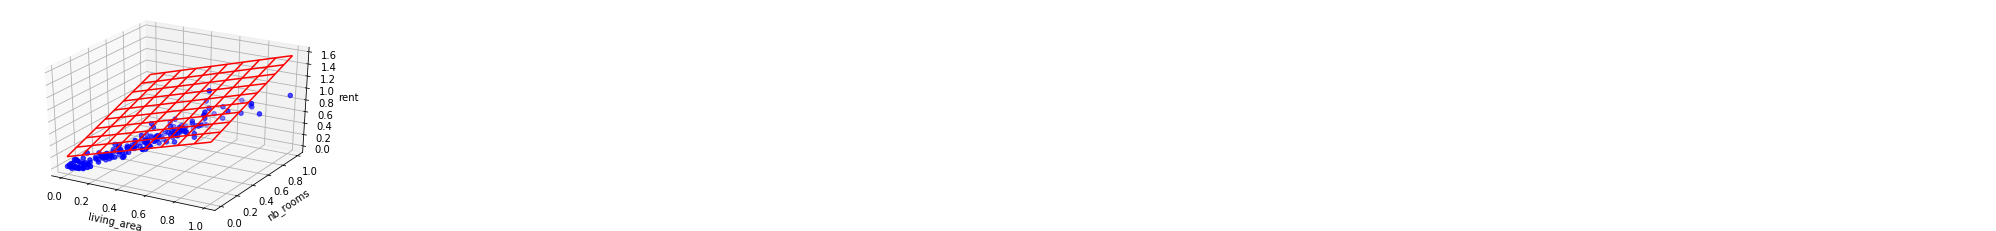

In [84]:
x = np.array(np.linspace(np.min(X),np.max(X),10))
y = np.array(np.linspace(np.min(X),np.max(X),10))
x,y = np.meshgrid(x,y)
z_ori = intercept_ori + (x * slope_1_ori) + (y * slope_2_ori)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(living_area,nb_rooms,rent,color='blue')
ax.plot_wireframe(x,y,z_ori,color='red')
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')

plt.show()

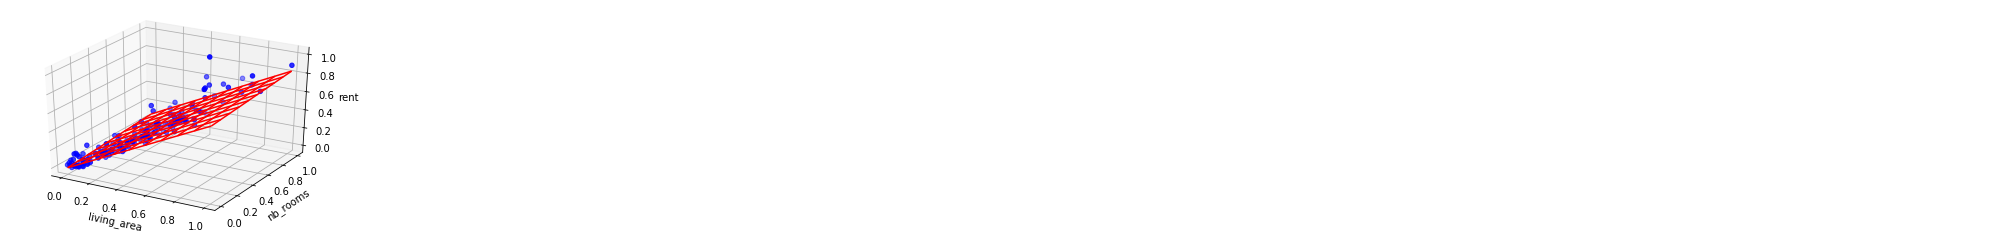

In [85]:
x = np.array(np.linspace(np.min(X),np.max(X),10))
y = np.array(np.linspace(np.min(X),np.max(X),10))
x,y = np.meshgrid(x,y)
z = intercept + (x * slope_1) + (y * slope_2)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(living_area,nb_rooms,rent,color='blue')
ax.plot_wireframe(x,y,z,color='red')
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')

plt.show()

We can see, that the removing of the second 1/N imporves the prediction by a lot.

c) You may find difficulties to make the algorithm converge on the dimension of the number
of rooms. We may have a normalisation problem here as the number of rooms is very
small in comparison to the living area. Implement the zero-norm normalisation and apply
it to the number of rooms and living area. Re-run the algorithm of point b. Does it help
for the convergence ?

[-4.15954115e-17  9.84218601e-01 -8.83568328e-02]


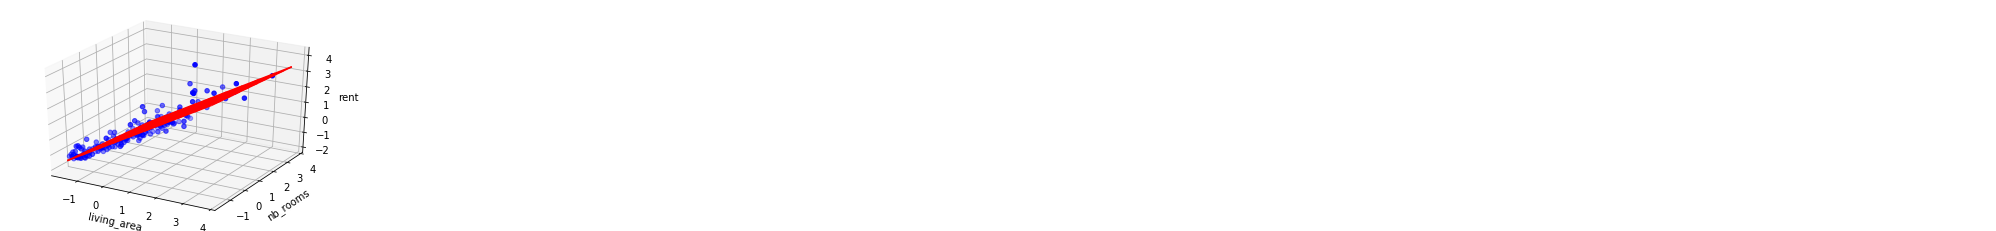

In [87]:
# zero-norm normalisation
rent = 1.0 * (rent - np.average(rent)) / np.std(rent)
living_area = 1.0 * (living_area - np.average(living_area)) / np.std(living_area)
nb_rooms = 1.0 * (nb_rooms - np.average(nb_rooms)) / np.std(nb_rooms)

X = np.c_[living_area,nb_rooms]

Xtmp = np.c_[np.ones(X.shape[0]),X]

lr = 0.001
itr = 200000

theta = gradient_descent_fixed(Xtmp,rent,lr,itr,verbose=False)
print(theta)

slope_1 = theta[1]
slope_2 = theta[2]
intercept = theta[0]

x = np.array(np.linspace(np.min(X),np.max(X),10))
y = np.array(np.linspace(np.min(X),np.max(X),10))
x,y = np.meshgrid(x,y)
z = intercept + (x * slope_1) + (y * slope_2)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(living_area,nb_rooms,rent,color='blue')
ax.plot_wireframe(x,y,z,color='red')
ax.set_xlabel('living_area')
ax.set_ylabel('nb_rooms')
ax.set_zlabel('rent')

plt.show()

Yes it helps. We can basically not see a difference in the plot anymore. Between sklearn and our (corrected) implementation)

### Exercice 2 Linear regression optimisation

a) Read the data in separate variables for the training and cross-validation sets.

In [96]:
dataset_train = pd.read_excel(path + '/overfitting.xlsx', sheet_name='train_set')
dataset_test = pd.read_excel(path + '/overfitting.xlsx', sheet_name='cv_set')

b) Define a cost function
J
(
θ
)
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

In [97]:
def computeCost(yGotten,yTarget):
    N = yGotten.shape[0]     # number of sample
    return (1.0/(2.0*N)) * np.sum((yGotten-yTarget)**2)

c) Perform the training for increasing orders
O
= 1
,...,
7
. You can use any training method
developed in the previous practical work (using the
normal
equations is probably
the easiest choice).

1.4475717615952588 1.6847154542031637
1.394061286299296 1.6337767766747064
1.357117201548026 1.5564548056330603
0.14837514744847288 1.0777764829974956
0.1428040406607826 0.8991412827024023
0.07376425904414052 2.1286983992169586
0.06062734100587435 3.724045874286393


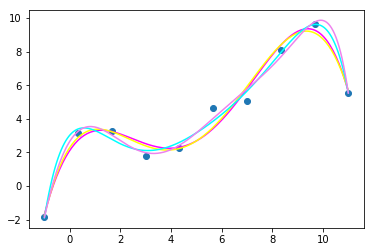

In [109]:
N = len(dataset_train)

xTrain = dataset_train['x']
yTrain = dataset_train['y']
x_curve = len(dataset_train)
xMin = np.min(xTrain)
xMax = np.max(xTrain)
yMin = np.min(yTrain)
yMax = np.max(yTrain)

xCross = dataset_test['x']
yCross = dataset_test['y']

plt.scatter(dataset_train['x'],dataset_train['y'])

#1st order
Xtmp = np.c_[np.ones(N),xTrain]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = theta[0] + theta[1] * x_curve
plt.plot(x_curve,y_curve,color='red')
yGotten = theta[0] + theta[1] * xTrain
JT1 = computeCost(yGotten,yTrain)  #compute cost on train set
yGotten = theta[0] + theta[1] * xCross
JC1 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT1, JC1)

#2nd order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = theta[0] + theta[1] * x_curve + theta[2] * x_curve**2
plt.plot(x_curve,y_curve,color='green')
yGotten = theta[0] + theta[1] * xTrain + theta[2] * xTrain**2
JT2 = computeCost(yGotten,yTrain)
yGotten = theta[0] + theta[1] * xCross + theta[2] * xCross**2
JC2 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT2, JC2)

#3rd order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2,xTrain**3]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = theta[0] + theta[1] * x_curve + theta[2] * x_curve**2 + theta[3] * x_curve**3
plt.plot(x_curve,y_curve,color='blue')
yGotten = theta[0] + theta[1] * xTrain + theta[2] * xTrain**2 + theta[3] * xTrain**3
JT3 = computeCost(yGotten,yTrain)
yGotten = theta[0] + theta[1] * xCross + theta[2] * xCross**2 + theta[3] * xCross**3
JC3 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT3, JC3)

#4th order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2,xTrain**3,xTrain**4]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
x_curve = np.array(np.linspace(xMin,xMax,200))
y_curve = (theta[0] + theta[1] * x_curve + theta[2] * x_curve**2 + theta[3] * x_curve**3 
           + theta[4] * x_curve**4)
plt.plot(x_curve,y_curve,color='magenta')
yGotten = (theta[0] + theta[1] * xTrain + theta[2] * xTrain**2 + theta[3] * xTrain**3
           + theta[4] * xTrain**4)
JT4 = computeCost(yGotten,yTrain)
yGotten = (theta[0] + theta[1] * xCross + theta[2] * xCross**2 + theta[3] * xCross**3
           + theta[4] * xCross**4)
JC4 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT4, JC4)

#5th order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2,xTrain**3,xTrain**4,xTrain**5]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = (theta[0] + theta[1] * x_curve + theta[2] * x_curve**2 + theta[3] * x_curve**3 
           + theta[4] * x_curve**4 + theta[5] * x_curve**5)
plt.plot(x_curve,y_curve,color='yellow')
yGotten = (theta[0] + theta[1] * xTrain + theta[2] * xTrain**2 + theta[3] * xTrain**3
           + theta[4] * xTrain**4 + theta[5] * xTrain**5)
JT5 = computeCost(yGotten,yTrain)
yGotten = (theta[0] + theta[1] * xCross + theta[2] * xCross**2 + theta[3] * xCross**3
           + theta[4] * xCross**4 + theta[5] * xCross**5)
JC5 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT5, JC5)

#6th order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2,xTrain**3,xTrain**4,xTrain**5,xTrain**6]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = (theta[0] + theta[1] * x_curve + theta[2] * x_curve**2 + theta[3] * x_curve**3 
           + theta[4] * x_curve**4 + theta[5] * x_curve**5 + theta[6] * x_curve**6)
plt.plot(x_curve,y_curve,color='cyan')
yGotten = (theta[0] + theta[1] * xTrain + theta[2] * xTrain**2 + theta[3] * xTrain**3
           + theta[4] * xTrain**4 + theta[5] * xTrain**5 + theta[6] * xTrain**6)
JT6 = computeCost(yGotten,yTrain)
yGotten = (theta[0] + theta[1] * xCross + theta[2] * xCross**2 + theta[3] * xCross**3
           + theta[4] * xCross**4 + theta[5] * xCross**5 + theta[6] * xCross**6)
JC6 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT6, JC6)

#7th order
Xtmp = np.c_[np.ones(N),xTrain,xTrain**2,xTrain**3,xTrain**4,xTrain**5,xTrain**6,xTrain**7]
theta = np.linalg.inv(Xtmp.transpose().dot(Xtmp)).dot(Xtmp.transpose()).dot(yTrain)
y_curve = (theta[0] + theta[1] * x_curve + theta[2] * x_curve**2 + theta[3] * x_curve**3 
           + theta[4] * x_curve**4 + theta[5] * x_curve**5 + theta[6] * x_curve**6
          + theta[7] * x_curve**7)
plt.plot(x_curve,y_curve,color='red')
yGotten = (theta[0] + theta[1] * xTrain + theta[2] * xTrain**2 + theta[3] * xTrain**3
          + theta[4] * xTrain**4 + theta[5] * xTrain**5 + theta[6] * xTrain**6
          + theta[7] * xTrain**7)
JT7 = computeCost(yGotten,yTrain)
yGotten = (theta[0] + theta[1] * xCross + theta[2] * xCross**2 + theta[3] * xCross**3
           + theta[4] * xCross**4 + theta[5] * xCross**5 + theta[6] * xCross**6
          + theta[7] * xCross**7)
JC7 = computeCost(yGotten,yCross)  #compute cost on cv set
print(JT7, JC7)

e) Plot the evolution of the costs
J
train
(
θ
)
and
J
cv
(
θ
)
as a function of the order
O
.

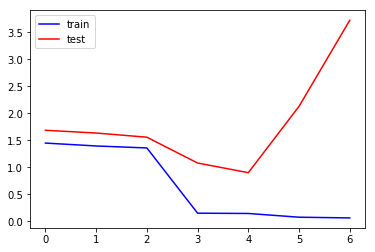

In [111]:
costTrainEvol = np.array([JT1,JT2,JT3,JT4,JT5,JT6,JT7])
plt.plot(costTrainEvol, color='blue')
costCrossEvol = np.array([JC1,JC2,JC3,JC4,JC5,JC6,JC7])
plt.plot(costCrossEvol, color='red')
plt.legend(['train', 'test'])

f) What is your best model according to these costs ? Comment your answer.

We can see that after 4th order the test set the cost shoots up and there is no imporvment in the cost in the training set. Therefore the best is 3th or 4th order.